# Machine learning notebook

## Data prep

### Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Loading Data and visualization

From the directory, load the data

In [3]:
labels = ['BACTERIA', 'NORMAL', 'VIRUS']
directories = ['NORMAL', 'PNEUMONIA']
img_size = 100
def get_training_data(data_dir):
    data = [] 
    for directory in directories: 
        path = data_dir+"/"+directory
        if (directory == 'NORMAL'):
            class_num = 0
        else:
            class_num = -1
        for img in os.listdir(path):
            try:
                if (directory == 'NORMAL'): ## deciding on the class number
                    class_num = 0
                else:
                    if "bacteria" in img:
                        class_num = 1
                    else:
                        class_num = 2
                
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])               
                
                
            except Exception as e:
                print(e)
                
    return data

Data is the loaded the data. Then the structure of a sample of the data is shown, and and image is plotted from it.

In [4]:
data_training = get_training_data('C:/Users/yeska/Documents/master/ml/project/images/chest_xray/train')
data_validation = get_training_data('C:/Users/yeska/Documents/master/ml/project/images/chest_xray/val')
data_test = get_training_data('C:/Users/yeska/Documents/master/ml/project/images/chest_xray/test')


NameError: name 'data' is not defined

[array([[22, 18, 24, ..., 94, 93, 93],
       [19, 20, 14, ..., 97, 93, 90],
       [20, 19, 15, ..., 94, 91, 88],
       ...,
       [29, 29, 29, ..., 21, 23, 24],
       [30, 27, 26, ..., 43, 46, 45],
       [38, 36, 37, ..., 86, 89, 91]], dtype=uint8), 0]


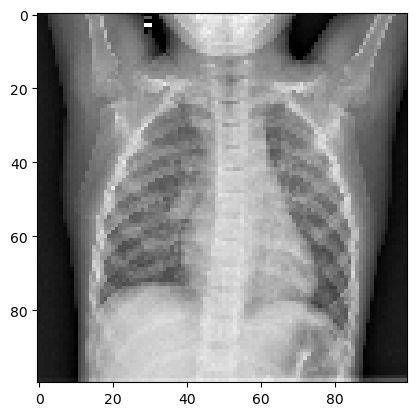

In [6]:

print(data_training[0])
plt.imshow(data_training[0][0], cmap='gray')

Below shows the count of each class

C:\Users\yeska\anaconda3\envs\machineLearningCourse\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yeska\anaconda3\envs\machineLearningCourse\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yeska\anaconda3\envs\machineLearningCourse\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\yeska\anaconda3\envs\machineLearningCourse\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

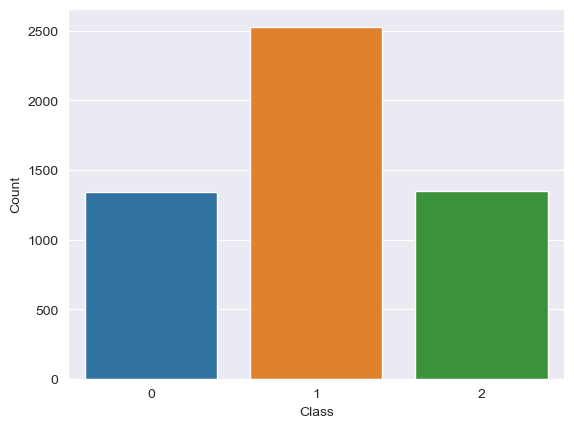

In [7]:
labels = [item[1] for item in data_training]
sns.set_style('darkgrid')
sns.countplot(x=labels)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

This is dividing the data into x and y. A printout of a sample is also provided for visualization.

In [8]:
#pdata = np.array(data)
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in data_training:
    x_train.append(feature)
    y_train.append(label)

for feature, label in data_validation:
    x_val.append(feature)
    y_val.append(label)
    
for feature, label in data_test:
    x_test.append(feature)
    y_test.append(label)

print(x_train[0])
print(y_train[0])

[[22 18 24 ... 94 93 93]
 [19 20 14 ... 97 93 90]
 [20 19 15 ... 94 91 88]
 ...
 [29 29 29 ... 21 23 24]
 [30 27 26 ... 43 46 45]
 [38 36 37 ... 86 89 91]]
0


Normalization is done here, and again a printout to show.

In [9]:
x_train = np.array(x_train)/255 
y_train = np.array(y_train)
print(x_train[0])

[[0.08627451 0.07058824 0.09411765 ... 0.36862745 0.36470588 0.36470588]
 [0.0745098  0.07843137 0.05490196 ... 0.38039216 0.36470588 0.35294118]
 [0.07843137 0.0745098  0.05882353 ... 0.36862745 0.35686275 0.34509804]
 ...
 [0.11372549 0.11372549 0.11372549 ... 0.08235294 0.09019608 0.09411765]
 [0.11764706 0.10588235 0.10196078 ... 0.16862745 0.18039216 0.17647059]
 [0.14901961 0.14117647 0.14509804 ... 0.3372549  0.34901961 0.35686275]]


Save the data of x_train, y_train, x_val, y_val, x_test, y_test

In [10]:
np.save("savedData/x_train.npy", x_train)
np.save("savedData/y_train.npy", y_train)

np.save("savedData/x_val.npy", x_val)
np.save("savedData/y_val.npy", y_val)

np.save("savedData/x_test.npy", x_test)
np.save("savedData/y_test.npy", y_test)

### Data Augmentation

Reshaping, this is necessary for data augmentation. It might also be necessary for some model fitting.

In [5]:
#this is to load x and y train without running the code above
x_train = np.load("savedData/x_train.npy")
y_train = np.load("savedData/y_train.npy")
print(x_train[0])
print(y_train[0])

[[0.08627451 0.07058824 0.09411765 ... 0.36862745 0.36470588 0.36470588]
 [0.0745098  0.07843137 0.05490196 ... 0.38039216 0.36470588 0.35294118]
 [0.07843137 0.0745098  0.05882353 ... 0.36862745 0.35686275 0.34509804]
 ...
 [0.11372549 0.11372549 0.11372549 ... 0.08235294 0.09019608 0.09411765]
 [0.11764706 0.10588235 0.10196078 ... 0.16862745 0.18039216 0.17647059]
 [0.14901961 0.14117647 0.14509804 ... 0.3372549  0.34901961 0.35686275]]
0


In [7]:
img_size = 100
x_train_reshaped = x_train.reshape(-1, img_size, img_size, 1) #apparently needed for CNN


In [8]:
print(x_train_reshaped.shape)
print(x_train.shape)


(5220, 100, 100, 1)
(5220, 100, 100)


This is the image data generator from keras. This is basically the setting of the data augmentation. Here we have set it to only zoom and flip.

In [9]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train_reshaped)

A bit of visualization of how one image can be augmented using the settings.

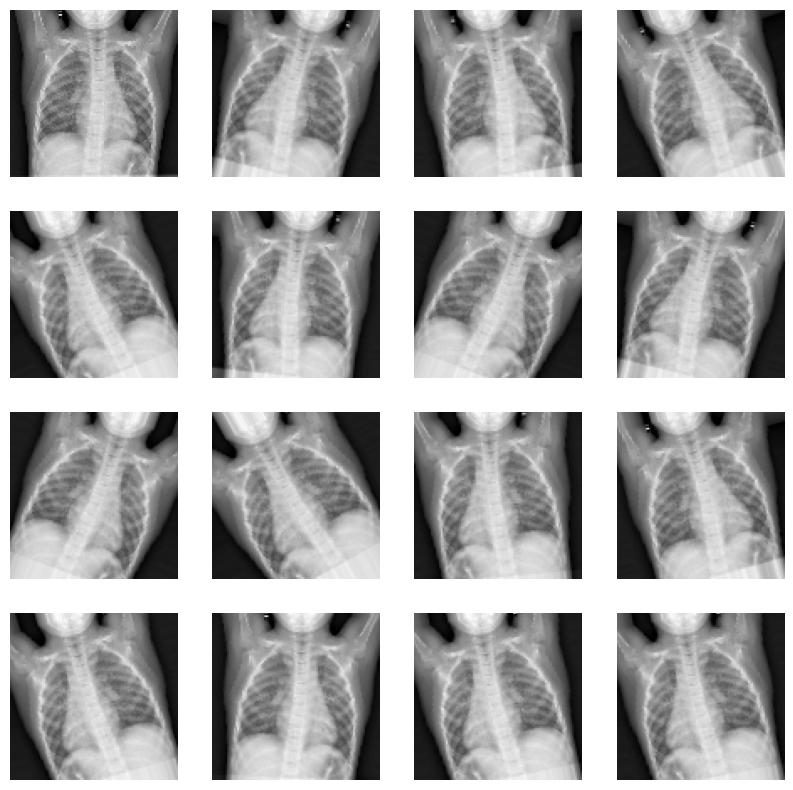

In [14]:
img_array = x_train_reshaped[0]
img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels)

generator = datagen.flow(img_array, batch_size=1)

plt.figure(figsize=(10, 10))

plt.subplot(4, 4, 1)
plt.imshow(img_array[0, :, :, 0], cmap='gray')  # Assuming images are grayscale
plt.axis('off')

i = 0
for b in generator:
    plt.subplot(4, 4, i+2)
    plt.imshow(b[0, :, :, 0], cmap='gray')  # Assuming images are grayscale
    plt.axis('off')
    i += 1
    if i >= 15:
        break
plt.show()


Now we actually generate images using this datagen. It is collected in augmented images and augmented labels

In [15]:
# Create a generator that applies the same augmentations to both images and labels
augmented_data_generator = datagen.flow(x_train_reshaped, y_train, batch_size=1, seed=42)

# Generate augmented images and labels
num_augmented_images = 2 * len(x_train_reshaped)  # You can adjust this based on your requirement
augmented_images, augmented_labels = [], []

for _ in range(num_augmented_images):
    batch = augmented_data_generator.next()
    augmented_images.append(batch[0][0])
    augmented_labels.append(batch[1][0])

# Convert the lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [12]:
augmented_images, augmented_labels = [], []

batches = 0
for x_batch, y_batch in datagen.flow(x_train_reshaped, y_train, batch_size=99):
    #model.fit(x_batch, y_batch)
    for i in range(len(x_batch)):
        augmented_images.append(x_batch[i])
        augmented_labels.append(y_batch[i])
    batches += 1
    if batches >= len(x_train)*2 / 99:
        # we need to break the loop by hand because
        # the generator loops indefinitely
        break
            
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

A bit of visualization of what's inside, first 16 images are shown

(10440, 100, 100, 1)


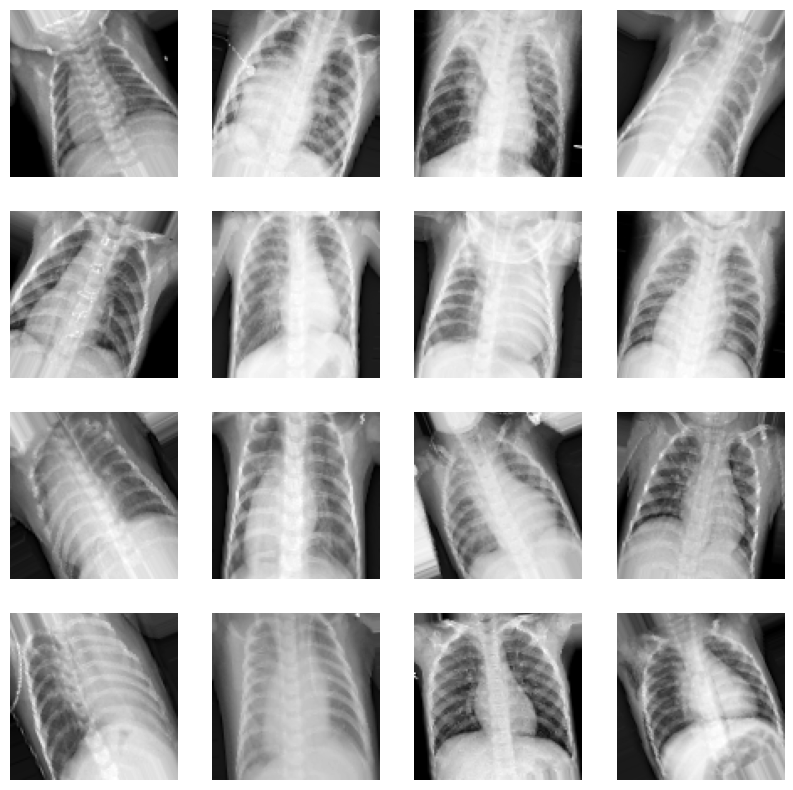

In [14]:
print(augmented_images.shape)
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(augmented_images[i, :, :, 0], cmap='gray')  # Assuming images are grayscale
    plt.axis('off')
plt.show()

You see again the count for each label, but this time it's augmented (so more data)

C:\Users\yeska\anaconda3\envs\machineLearningCourse\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yeska\anaconda3\envs\machineLearningCourse\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yeska\anaconda3\envs\machineLearningCourse\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


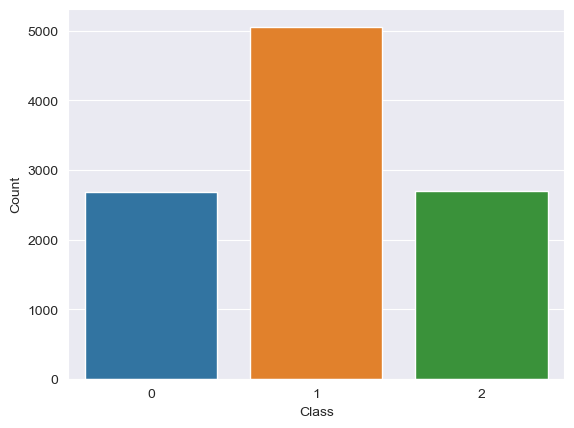

In [13]:

sns.set_style('darkgrid')
sns.countplot(x=augmented_labels)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Saved the data, so no need for reloading everytime

In [18]:
np.save("savedData/aug_x_train.npy", augmented_images)
np.save("savedData/aug_y_train.npy", augmented_labels)